<a href="https://colab.research.google.com/github/Ziqing-WU/Linear_Model/blob/main/Mod%C3%A8lelin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">TP noté - Modèle linéaire </div>
<div style="font-size:12pt; line-height:20pt; text-align:center;">Shuang Hou, Ziqing Wu</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Exercice 1 
>Nous souhaitons maintenant evaluer si un nouveau traitement a un effet significatif sur l'efficacité d'un moteur en fonction de son âge.  

## QUESTION 1.1 
>Lisez le fichier Observations_2.csv qui contient les données, traitez les et representez les avec :
<br>-> 'Age' en abscisse
<br>-> 'Efficiency' en ordonnée
<br>-> Les observations avec le traitement standard (Standard) en bleu
<br>-> Les observations avec le nouveau traitement (Tested) en rouge.
<br>A la vue du graphe, vous semble-t-il y avoir un effet ?

Tout d'abord, on importe les données en utilisant pandas. Pour avoir une première idée des données, on affiche les premières lignes de dataframe.

In [ ]:
dataframe=pd.read_csv("./Observations_2.csv",sep=' ')
dataframe.head()

,Treatment,Age,Efficiency
0,Standard,3.9479,3.2224
1,Standard,1.7838,1.5127
2,Standard,7.4415,4.3736
3,Standard,8.5625,5.2151
4,Standard,9.8002,5.4256


In [ ]:
set(dataframe["Treatment"])

{'Standard', 'Tested'}

On voit que les types de traitement contient bien la méthode classique, dite "standard", et la nouvelle méthode, dite "tested". Pour tracer les points de ces deux types de traitement, on fait une opération "group by" pour avoir les deux data sets.

In [ ]:
standard = dataframe.groupby("Treatment").get_group("Standard")
tested = dataframe.groupby("Treatment").get_group("Tested")

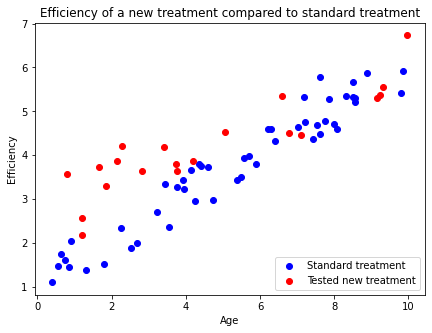

In [ ]:
# Display the figure
fig, ax = plt.subplots(figsize=(7, 5))
plt.xlabel("Age")
plt.ylabel("Efficiency")
plt.title("Efficiency of a new treatment compared to standard treatment")
ax.scatter(standard["Age"], standard["Efficiency"], c='b', label = 'Standard treatment')
ax.scatter(tested["Age"], tested["Efficiency"], c = 'r', label = 'Tested new treatment')
plt.legend(loc = 'lower right')

Sur le graphe, on constate que les points bleus sont légèrement plus "hauts" que les points rouges. Ceci est plus évident quand l'âge du moteur est plus petit. Cette observation signifie que le nouveau traitement est plus efficace que le traitement classique au moins pour une plage des âges. On dirait que le nouveau traitement a un effet globalement.

## QUESTION 1.2
>On supposera qu'il existe une relation linéaire entre l'âge du moteur et son niveau d'efficacité a un bruit Gaussien près. Utilisez un modèle de type régression linéaire pour mettre en lien les données. Utilisez ensuite un test statistique pour evaluer si l'impact du traitement est significatif.

In [ ]:
from sklearn.linear_model import LinearRegression
lr_1 = LinearRegression()
lr_1.fit(standard["Age"][:, np.newaxis], standard["Efficiency"])
lr_2 = LinearRegression()
lr_2.fit(tested["Age"][:, np.newaxis], tested["Efficiency"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


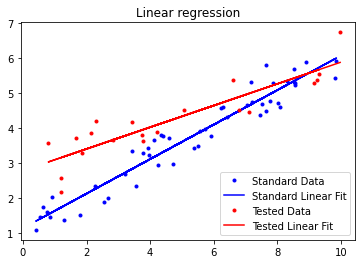

In [ ]:
fig = plt.figure()
plt.plot(standard["Age"], standard["Efficiency"], 'b.')
plt.plot(standard["Age"], lr_1.predict(standard["Age"][:, np.newaxis]), 'b-')
plt.plot(tested["Age"], tested["Efficiency"], 'r.')
plt.plot(tested["Age"], lr_2.predict(tested["Age"][:, np.newaxis]), 'r-')
plt.legend(('Standard Data', 'Standard Linear Fit', 'Tested Data', 'Tested Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


In [ ]:
np.var(standard['Efficiency'])

1.9129022289159996

In [ ]:
np.var(tested['Efficiency'])

1.080557849275

In [ ]:
np.mean(standard['Efficiency'])

3.7493779999999988

In [ ]:
np.mean(tested['Efficiency'])

4.216484999999999

In [ ]:
from scipy import stats
stats.levene(standard['Efficiency'],tested['Efficiency'])

LeveneResult(statistic=3.28296939474039, pvalue=0.07441769713576131)

In [ ]:
stats.ttest_ind(standard['Efficiency'],tested['Efficiency'],equal_var=False)

Ttest_indResult(statistic=-1.5082862812297302, pvalue=0.13836564038292126)

In [ ]:
# kf_data = np.array([standard['Efficiency'],tested['Efficiency']])
# kf = stats.chi2_contingency(kf_data)

# Exercice 2 
>Nous souhaitons développer une méthode de type apprentissage automatique qui quantifie en temps réel le risque de collision d'un drône avec des objets environnants.
<br>
<br>Pour y arriver, nous avons embarqué 18 capteurs sur un drône en phase de test. Un expert
a alors quantifié à plusieurs instants son risque de collision avec un autre objet.
<br>Un total de 67 observations labellisées ont été enregistrées dans le fichier 'Observations_1.csv'.
<br>
<br>Nous allons évaluer dans cet exercice si ces observations nous permettent de mettre en lien les données capteurs avec le niveau de risque. Nous allons aussi évaluer si nous aurions une bonne performance avec un sous ensemble pertinent des capteurs. Chaque capteur a en effet un poids non négligeable et à besoin d'énergie pour fonctionner, ce qui a un impact sur le temps d'utilisation du drone entre deux rechargements de ses batteries.  

In [ ]:
dataframe=pd.read_csv("./Observations_1.csv",sep=';')

dataframe.head()


,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Risk_level
0,11.6,6.4,4.3,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,-1.578984,2.209,9.02,0.26,94.285053,3.56,16.91,6
1,15.5,10.5,4.9,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,-2.497499,0.339,22.43,0.10,86.766527,7.06,-3.47,6
2,15.3,6.5,4.2,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,-3.638758,0.339,17.94,0.13,107.336147,3.20,10.05,10
3,13.4,7.7,4.1,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,-6.273760,1.611,11.38,0.20,136.516384,4.33,-3.62,18
4,16.0,5.2,3.2,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,-2.096575,0.659,8.56,0.27,88.774469,4.57,1.56,7


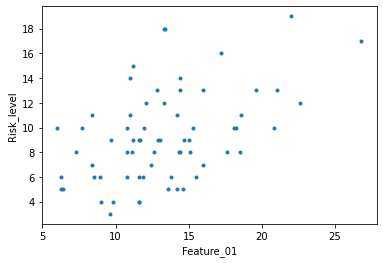

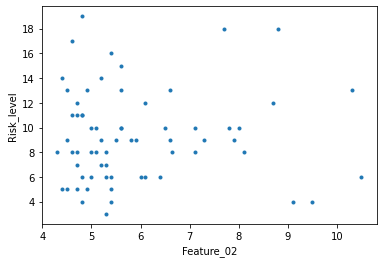

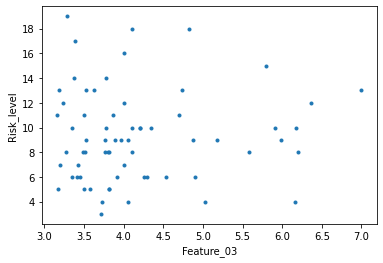

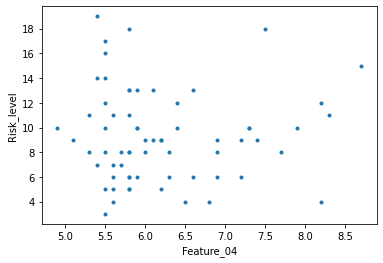

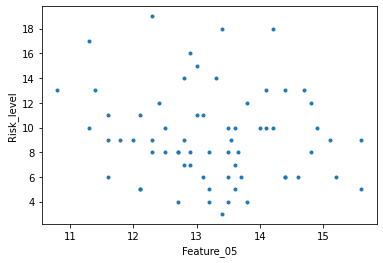

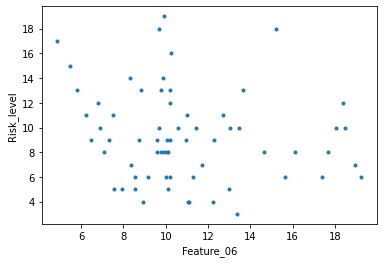

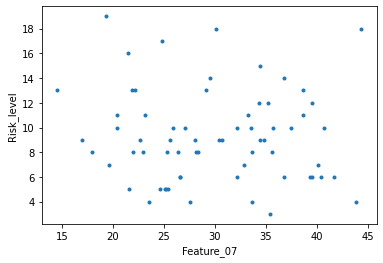

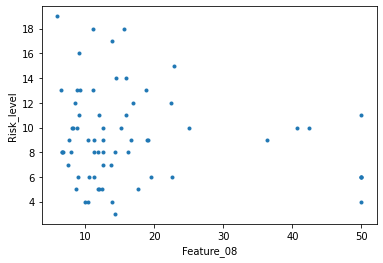

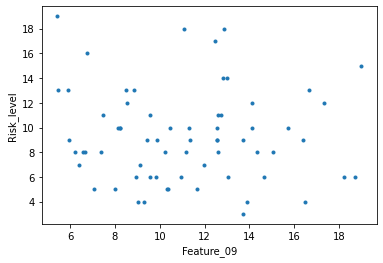

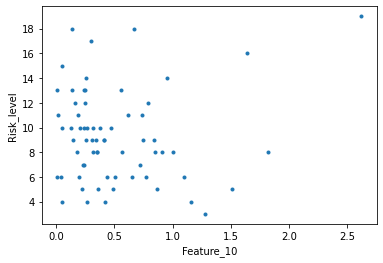

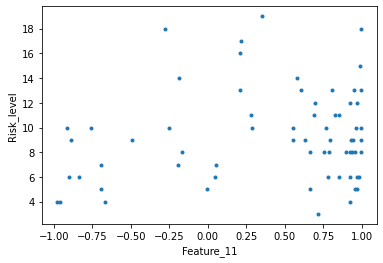

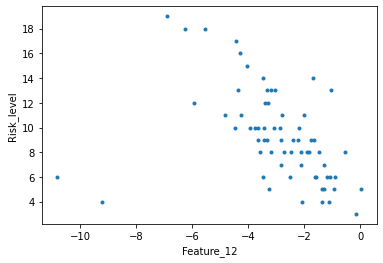

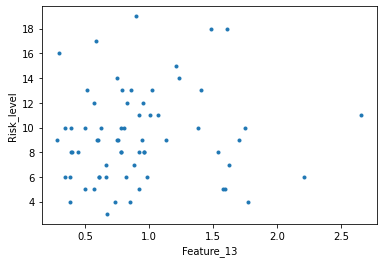

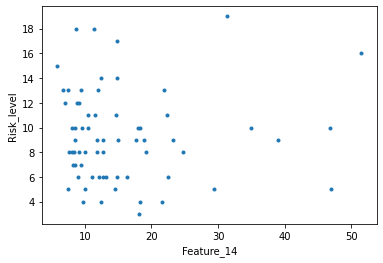

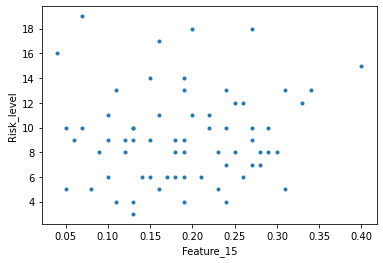

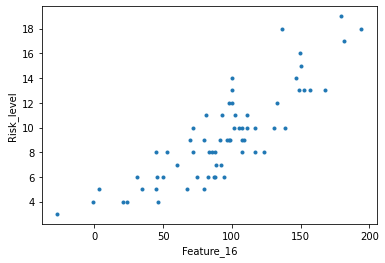

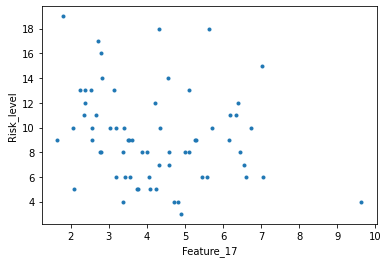

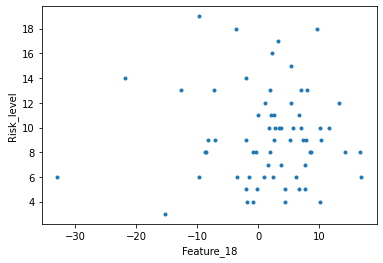

In [ ]:
listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('Risk_level')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Risk_level')
  plt.show()

#QUESTION 2.1 
>Observez les données unes par unes. Est-ce que vous identifiez visuellement des liens entre certaines variables et la variable 'Risk_level'. Si oui, lesquels ?

> Visuellement, les variables 'Feature_16' et 'Feature_01' ont une corrélation linéaire positive avec la variable 'Risk_level', mais la linéarité de 'Feature_16' est plus forte que celle de 'Feature_01', c'est-à-dire que le coefficient de détermination de 'Feature_16' est plus grand (proche de 1). En plus, la variable 'Feature_12' a une forte corrélation linéaire négative avec 'Risk_level'.


#QUESTION 2.2 
>On se demande si il est possible de predire le niveau de 'Risk_level' à partir d'une seule des variables 'Feature_01', 'Feature_07' ou 'Feature_16'. 

### QUESTION 2.2.1
>Effectuez une régression linéaire simple entre 'Risk_level' et chacune de ces variables.  Toutes les données seront utilisées. Evaluez alors la qualité des predictions a sur toutes les données l'aide de la moyenne de l'erreur de prediction au carre (MSE). Quel est le risque potentiel en utilisant cette stratégie de validation de l'apprentissage ? 

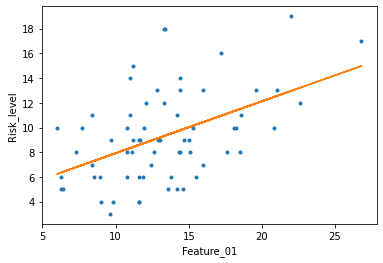

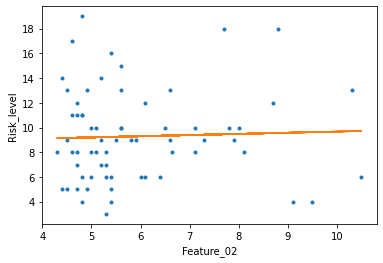

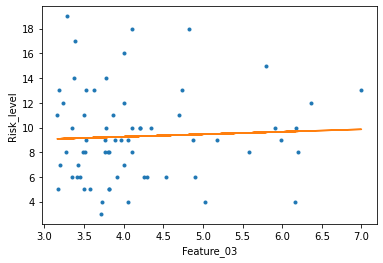

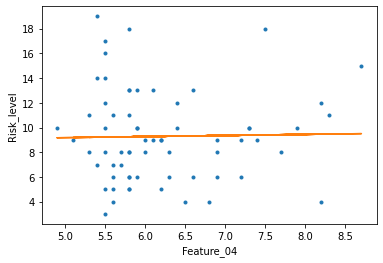

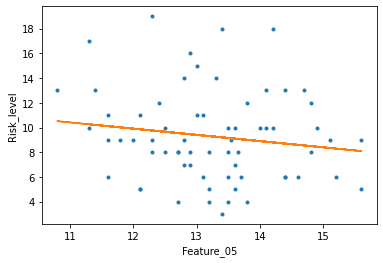

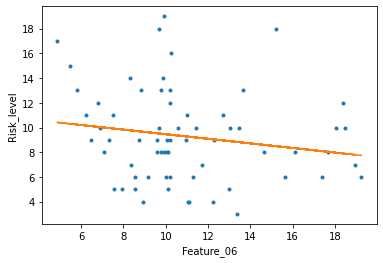

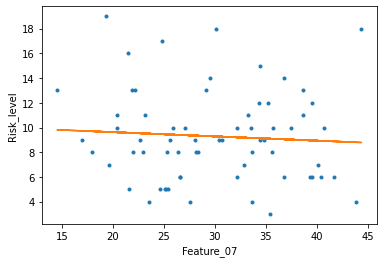

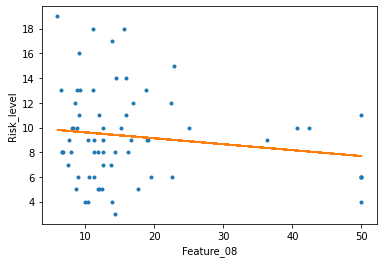

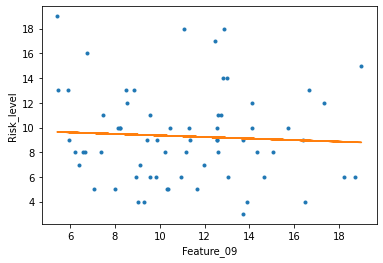

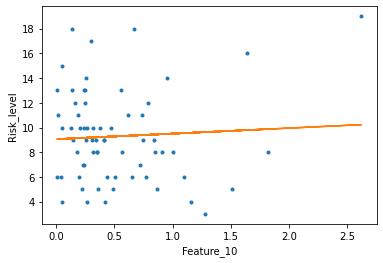

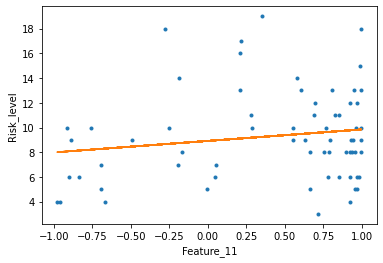

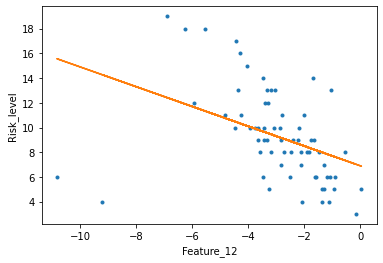

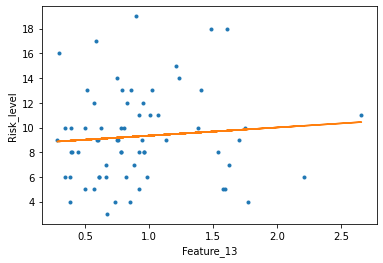

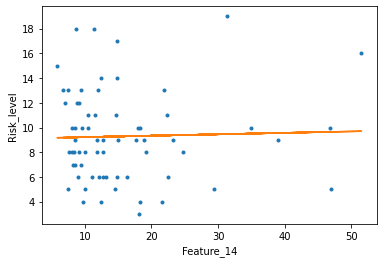

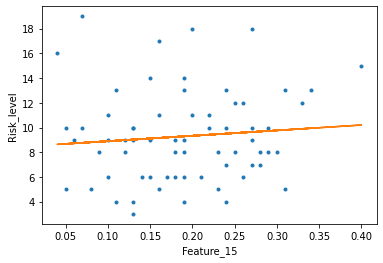

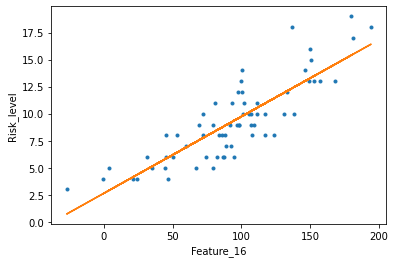

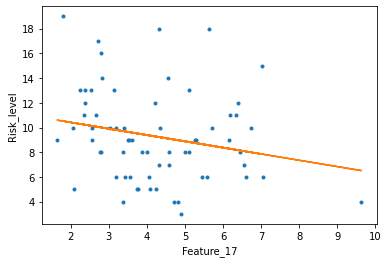

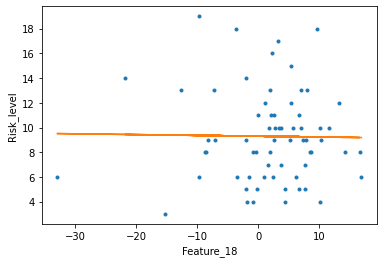

[10.480923895867484, 13.548795843877867, 13.5345229904373, 13.563010428302752, 13.264848672811542, 13.155466009777175, 13.506926344682194, 13.243806136638321, 13.523200532992492, 13.523335021468025, 13.2098195797722, 11.285264479808852, 13.469672989882401, 13.555759088865793, 13.445766642256862, 3.8333467105730303, 12.914015422070385, 13.56562961819463]


In [ ]:
from sklearn.metrics import mean_squared_error
MSE = []
for Col in range(len(listColNames)):
  lr = LinearRegression();
  lr.fit(X[:, Col:Col+1], Y[:]);
  MSE.append(mean_squared_error(Y[:], lr.predict(X[:, Col:Col+1])))
  plt.plot(X[:,Col],Y[:],'.')
  plt.plot(X[:,Col],lr.predict(X[:, Col:Col+1]),'-')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Risk_level')
  plt.show()

print(MSE)
  

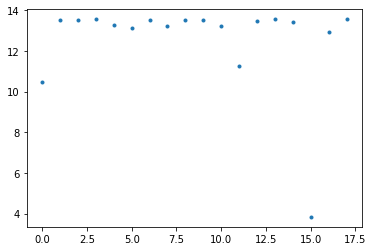

In [ ]:
plt.plot(MSE,'.')

### QUESTION 2.2.2
>Evaluez a quel point les predictions sont stables a l'aide d'une methode de validation croisee de type 4-folds.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

kf = KFold(n_splits=4);
for alpha in np.arange(0,10,0.5):
  sum_mse_scores=0.
  for train, test in kf.split(X):
      X_train=X[train]
      y_train=Y[train]
      X_test=X[test]
      y_test=Y[test]
      lasso_regressor = Lasso(alpha=alpha)
      lasso_regressor.fit(X_train, y_train)
      y_pred_lasso = lasso_regressor.predict(X_test)
      mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
      sum_mse_scores+=mse_score_lasso
  print(alpha," total: ",sum_mse_scores)

0.0  total:  25.16545929148056
0.5  total:  16.6746609802828
1.0  total:  16.361909933265153
1.5  total:  16.556855376945585
2.0  total:  16.668821592336556
2.5  total:  16.612892506931768
3.0  total:  16.540128701100816
3.5  total:  16.458697326640195
4.0  total:  16.395877464680236
4.5  total:  16.346753334878947
5.0  total:  16.317173595212275
5.5  total:  16.328322228930436
6.0  total:  16.354480060581025
6.5  total:  16.36852449725481
7.0  total:  16.379068263182283
7.5  total:  16.390760140780536
8.0  total:  16.403588185355268
8.5  total:  16.417552396906466
9.0  total:  16.432652775434136
9.5  total:  16.44888932093828


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.17535337365814, tolerance: 0.07079591836734694
  positive)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

kf = KFold(n_splits=4);
for alpha in np.arange(4.5,5.5,0.05):
  sum_mse_scores=0.
  for train, test in kf.split(X):
      X_train=X[train]
      y_train=Y[train]
      X_test=X[test]
      y_test=Y[test]
      lasso_regressor = Lasso(alpha=alpha)
      lasso_regressor.fit(X_train, y_train)
      y_pred_lasso = lasso_regressor.predict(X_test)
      mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
      sum_mse_scores+=mse_score_lasso
  print(alpha," total: ",sum_mse_scores)

4.5  total:  16.346753334878947
4.55  total:  16.342601784161072
4.6  total:  16.338588572036333
4.6499999999999995  total:  16.334713698504732
4.699999999999999  total:  16.33097716356626
4.749999999999999  total:  16.325310340019836
4.799999999999999  total:  16.317075656943096
4.849999999999999  total:  16.316755881227245
4.899999999999999  total:  16.316745028594788
4.949999999999998  total:  16.316884264867312
4.999999999999998  total:  16.317173595212278
5.049999999999998  total:  16.317613019629672
5.099999999999998  total:  16.31820253811951
5.149999999999998  total:  16.318942150681785
5.1999999999999975  total:  16.31983185720504
5.249999999999997  total:  16.320871823722403
5.299999999999997  total:  16.322061644175534
5.349999999999997  total:  16.323401636463707
5.399999999999997  total:  16.324891725168474
5.449999999999997  total:  16.326531906868716


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

kf = KFold(n_splits=4);
for alpha in np.arange(4.8,5,0.005):
  sum_mse_scores=0.
  for train, test in kf.split(X):
      X_train=X[train]
      y_train=Y[train]
      X_test=X[test]
      y_test=Y[test]
      lasso_regressor = Lasso(alpha=alpha)
      lasso_regressor.fit(X_train, y_train)
      y_pred_lasso = lasso_regressor.predict(X_test)
      mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
      sum_mse_scores+=mse_score_lasso
  print(alpha," total: ",sum_mse_scores)

4.8  total:  16.317075656943096
4.805  total:  16.316893991537963
4.81  total:  16.31687261600524
4.8149999999999995  total:  16.31685277152007
4.819999999999999  total:  16.316834427788585
4.824999999999999  total:  16.3168175848108
4.829999999999999  total:  16.316802242586704
4.834999999999999  total:  16.3167884011163
4.839999999999999  total:  16.31677606039959
4.844999999999999  total:  16.316765220436572
4.849999999999999  total:  16.316755881227245
4.854999999999999  total:  16.31674804277162
4.8599999999999985  total:  16.316741705069678
4.864999999999998  total:  16.316736868121435
4.869999999999998  total:  16.316733531926882
4.874999999999998  total:  16.316731695735687
4.879999999999998  total:  16.31673136042606
4.884999999999998  total:  16.316732526057155
4.889999999999998  total:  16.31673519262898
4.894999999999998  total:  16.31673936014152
4.899999999999998  total:  16.316745028594788
4.904999999999998  total:  16.31675219798878
4.9099999999999975  total:  16.316760

On dirait le $\alpha$ qui rend le MSE minimal est 4,88. Le MSE minimal est 16.

In [ ]:
y_scaled = preprocessing.scale(Y)
X_scaled = np.zeros(X.shape)
for i in range (len(X[0])):
  X_scaled[:,i] = preprocessing.scale(X[:,i])
print(X_scaled[0][0])
alpha = 4.88
sum_mse_scores = 0
for train, test in kf.split(X_scaled):
      X_train=X_scaled[train]
      y_train=y_scaled[train]
      X_test=X_scaled[test]
      y_test=y_scaled[test]
      lasso_regressor = Lasso(alpha=alpha)
      lasso_regressor.fit(X_train, y_train)
      y_pred_lasso = lasso_regressor.predict(X_test)
      mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
      sum_mse_scores+=mse_score_lasso
print(alpha," total: ",sum_mse_scores)

-0.39452240926692955
4.88  total:  4.0276927113599


>Peut-on enfin dire si on observe une relation significative entre 'Risk_level' et (independament) 'Feature_01', 'Feature_07' ou bien 'Feature_16'. On peut le valider a l'aide d'un test d'hypothese dont on decrira la procedure.


# QUESTION 2.3
> On s'interesse maintenant au lien entre la variable 'Risk_level' et 'Feature_12'. On peut remarquer que ces donnees contiennent deux valeurs aberrantes.

### QUESTION 2.3.1
> Definissez une procedure pour detecter automatiquement deux donnees aberrantes dans un jeu de donnees.

>On peut d'abord appeler la fonction describe() et dessiner un histogramme pour explorer les données. La valeur moyenne de "Feature_12" est de -2,978, mais la valeur minimale atteint -10.8. L'histogramme peut également montrer intuitivement qu'il existe deux donnees aberrantes. 

       Feature_12
count   66.000000
mean    -2.978653
std      1.904327
min    -10.828537
25%     -3.627035
50%     -2.815750
75%     -1.666581
max      0.045798


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffba7a18198>]],
      dtype=object)

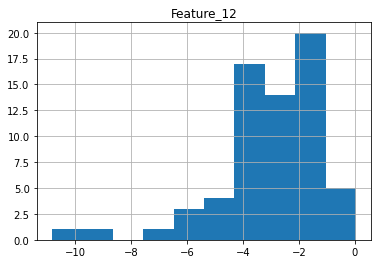

In [ ]:
print(dataframe[['Feature_12']].describe())
dataframe[['Feature_12']].hist()

>On peut aussi utiliser le boxplot pour détecter les données aberrantes: les points en dehors de l'intervalle interquartile du boxplot sont des données aberrantes.

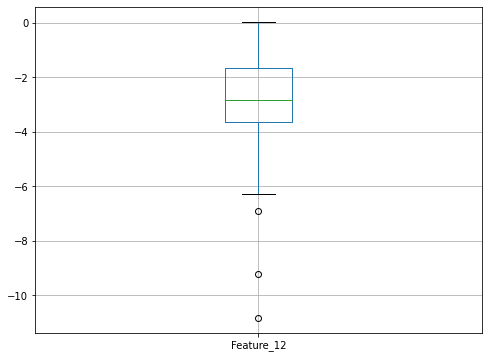

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
dataframe[['Feature_12']].boxplot('Feature_12',ax=ax)
plt.show()

### QUESTION 2.3.2
>Nous supprimerons dans la suite de cet exercice les deux observations qui sont aberrantes sur la variable 'Feature_12', et enregistre les données restantes dans une nouvelle dataframe_new.

       Feature_12
count   64.000000
mean    -2.758630
std      1.448414
min     -6.893747
25%     -3.514308
50%     -2.810350
75%     -1.643383
max      0.045798


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffba717f0f0>]],
      dtype=object)

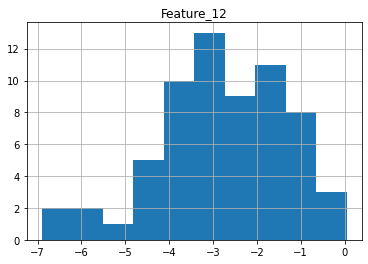

In [ ]:
dataframe_new = dataframe.loc[dataframe['Feature_12'] > -8]

print(dataframe_new[['Feature_12']].describe())
dataframe_new[['Feature_12']].hist()

> Comment auriez-vous traite ces observations si vous aviez absolument voulu preserver l'information qu'elles contiennent dans les autres variables ?

> ??? A completer  ???

# QUESTION 2.4
> Une fois les deux observations aberrantes de 'Feature_12' supprimees, on souhaite selectionner les variables de 'X' qui permettent de prédire au mieux 'Risk_level' a l'aide de la regression multiple regularisee.

### QUESTION 2.4.1
> Quelle strategie vous semble la plus appropriee pour selectionner les variables les plus pertinentes ? Quel pretraitement allez-vous de meme effectuer sur les donnees.

> Nous pouvons utiliser le modèle de régression Lasso pour analyser toutes les variables. Les variables dont les poids ne sont pas nulls sont celles les plus pertinentes et sont ce que nous voulons.
<br>Avant cela , il faut faire centrer et réduire les variables pour qu'elles soient dans la même échelle.

In [ ]:
from sklearn.linear_model import Lasso

X_scaled = preprocessing.scale(X)

lasso_regressor=Lasso(alpha=4.88, fit_intercept=True)
lasso_regressor.fit(X_scaled,Y)

print('Beta values :')
for Col in range(len(listColNames)):
  print('-> '+listColNames[Col]+': '+str(lasso_regressor.coef_[Col]))

Beta values :
-> Feature_01: 0.0
-> Feature_02: 0.0
-> Feature_03: 0.0
-> Feature_04: 0.0
-> Feature_05: -0.0
-> Feature_06: -0.0
-> Feature_07: -0.0
-> Feature_08: -0.0
-> Feature_09: -0.0
-> Feature_10: 0.0
-> Feature_11: 0.0
-> Feature_12: -0.0
-> Feature_13: 0.0
-> Feature_14: 0.0
-> Feature_15: 0.0
-> Feature_16: 0.0
-> Feature_17: -0.0
-> Feature_18: -0.0


> D'après le résultat des coefficients de la régression Lasso, on peut constater que les 'Feature_01', 'Feature_12' et 'Feature_16' sont les variables les plus pertinentes pour avoir une corrélation avec le 'Risk_level'.
<br>Leurs poids sont respectivement: 

### QUESTION 2.4.2
> Effectuez la procedure de selection des variables optimales en parametrant a la main le poids entre la qualite de prediction et le niveau de regularisation.

### QUESTION 2.4.3
> Effectuez la procedure automatique de parametrisation de ce poids, de sorte a ce q'un maximum de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale. Quelle methode de validation croisee vous semble la plus raisonnable ici ? La selection des variables est-elle stable ?